In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
dataset_df = pd.read_csv('/Users/amuhebwa/Documents/Stanford/Research_Code/CarbonMeasure_Responsibility/src/results/merged_metrics.csv')

In [11]:
dataset_df['model_id'] = dataset_df['model_id'].replace({'swinv2': 'swin', 'convnext': 'ConvNext', 'deit':'DeiT', 'vit': 'ViT'})
dataset_df['accuracy'] = dataset_df['accuracy']*100
dataset_df['experiment_name'] = dataset_df['experiment_name'].replace('PublicHarvestNet', 'HarvestNet')
tiny_models_df = dataset_df[dataset_df['model_size'] == 'Tiny'].reset_index(drop=True)
small_models_df = dataset_df[dataset_df['model_size'] == 'Small'].reset_index(drop=True)

experiments = dataset_df['experiment_name'].unique()
experiments

array(['EuroSAT', 'HarvestNet', 'Kenya_Roads'], dtype=object)

In [12]:
tiny_models_df[tiny_models_df['experiment_name']=='EuroSAT']

,full_model_name,duration,emissions,emissions_rate,energy_consumed,gpu_energy,experiment_name,model_name,accuracy,auroc,mcc,f1,precision,recall,carbon_emissions,model_size,model_id
0,EuroSAT_convnext_tiny_224,14560.752334,0.016284,1.118324e-06,0.079328,0.048516,EuroSAT,convnext_tiny_224,95.950898,NaN,0.954929,0.959517,0.959581,0.959509,0.016284,Tiny,ConvNext
2,EuroSAT_swinv2_tiny_patch4_window16_256,5489.837448,0.006482,1.180695e-06,0.031577,0.013096,EuroSAT,swinv2_tiny_patch4_window16_256,98.296079,NaN,0.981044,0.982960,0.983102,0.982961,0.006457,Tiny,swin
5,EuroSAT_vit_tiny_patch16_224,1762.710993,0.001491,8.459632e-07,0.007265,0.001111,EuroSAT,vit_tiny_patch16_224,97.801392,NaN,0.975529,0.978002,0.978055,0.978014,0.001489,Tiny,ViT
6,EuroSAT_deit_tiny_patch16_224,1559.222229,0.001297,8.317441e-07,0.006318,0.000918,EuroSAT,deit_tiny_patch16_224,97.306706,NaN,0.970033,0.973097,0.973293,0.973067,0.001297,Tiny,DeiT


/var/folders/gx/k47j1t9n50958_32jf6rssdw0000gq/T/ipykernel_25995/2276253468.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(experiment_data['model_id'], fontsize=10)
/var/folders/gx/k47j1t9n50958_32jf6rssdw0000gq/T/ipykernel_25995/2276253468.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(experiment_data['model_id'],fontsize=10)


<Figure size 640x480 with 0 Axes>

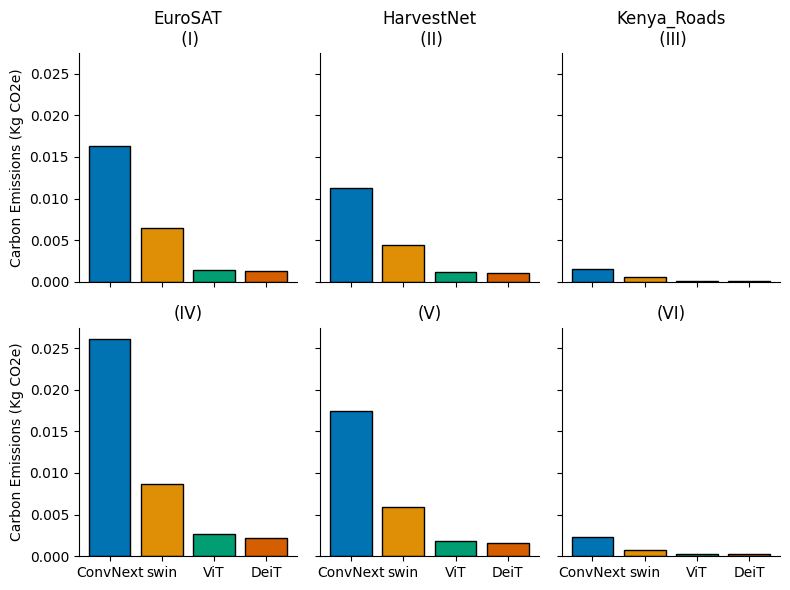

In [13]:
plt.clf()
palette = sns.color_palette("colorblind", 4)
#fig, axes = plt.subplots(2, 3, figsize=(10, 8), sharey=True)
fig, axes = plt.subplots(2, 3, figsize=(8, 6), sharey=True, sharex=True)

# Plotting carbon emissions for tiny models
label_match = {0:'(I)', 1:'(II)', 2:'(III)' }
for idx, experiment in enumerate(experiments):
    ax = axes[0, idx]
    experiment_data = tiny_models_df[tiny_models_df['experiment_name'] == experiment]
    colors = [palette[i % len(palette)] for i in range(len(experiment_data))]
    ax.bar(experiment_data['model_id'], experiment_data['carbon_emissions'],  color=colors, edgecolor='k')
    ax.set_title(f"{experiment}\n {label_match.get(idx)}")
    ax.set_xticklabels(experiment_data['model_id'], fontsize=10)
    if idx==0:
        ax.set_ylabel('Carbon Emissions (Kg CO2e)')
    sns.despine()

# Plotting carbon emissions for small models
label_match = {0:'(IV)', 1:'(V)', 2:'(VI)' }
for idx, experiment in enumerate(experiments):
    ax = axes[1, idx]
    experiment_data = small_models_df[small_models_df['experiment_name'] == experiment]
    colors = [palette[i % len(palette)] for i in range(len(experiment_data))]
    ax.bar(experiment_data['model_id'], experiment_data['carbon_emissions'],  color=colors, edgecolor='k')
    ax.set_title(f'{label_match.get(idx)}')
    ax.set_xticklabels(experiment_data['model_id'],fontsize=10)
    if idx==0:
        ax.set_ylabel('Carbon Emissions (Kg CO2e)')
    sns.despine()


plt.tight_layout()



/var/folders/gx/k47j1t9n50958_32jf6rssdw0000gq/T/ipykernel_25995/808924731.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(experiment_data['model_id'],fontsize=10)
/var/folders/gx/k47j1t9n50958_32jf6rssdw0000gq/T/ipykernel_25995/808924731.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(experiment_data['model_id'], fontsize=10)


<Figure size 640x480 with 0 Axes>

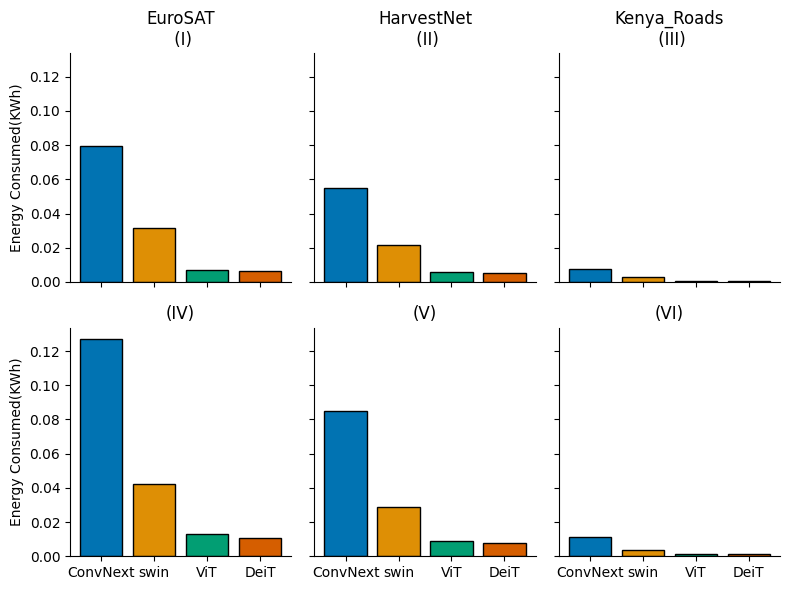

In [14]:
plt.clf()
palette = sns.color_palette("colorblind", 10)

fig, axes = plt.subplots(2, 3, figsize=(8, 6), sharey=True, sharex=True)
# fig.suptitle('Energy Consumed Across Experiments', fontsize=16)

# Plotting energy consumed for tiny models
label_match = {0:'(I)', 1:'(II)', 2:'(III)' }
for idx, experiment in enumerate(experiments):
    ax = axes[0, idx]
    experiment_data = tiny_models_df[tiny_models_df['experiment_name'] == experiment]
    colors = [palette[i % len(palette)] for i in range(len(experiment_data))]
    ax.bar(experiment_data['model_id'], experiment_data['energy_consumed'], color=colors, edgecolor='k')
    ax.set_title(f"{experiment}\n {label_match.get(idx)}")
    ax.set_xticklabels(experiment_data['model_id'],fontsize=10)
    if idx == 0:
        ax.set_ylabel('Energy Consumed(KWh)')
    sns.despine()

# Plotting energy consumed for small models
label_match = {0:'(IV)', 1:'(V)', 2:'(VI)' }
for idx, experiment in enumerate(experiments):
    ax = axes[1, idx]
    experiment_data = small_models_df[small_models_df['experiment_name'] == experiment]
    colors = [palette[i % len(palette)] for i in range(len(experiment_data))]
    ax.bar(experiment_data['model_id'], experiment_data['energy_consumed'], color=colors, edgecolor='k')
    ax.set_title(f'{label_match.get(idx)}')
    ax.set_xticklabels(experiment_data['model_id'], fontsize=10)
    if idx == 0:
        ax.set_ylabel('Energy Consumed(KWh)')
    sns.despine()

# Adjust layout
# plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

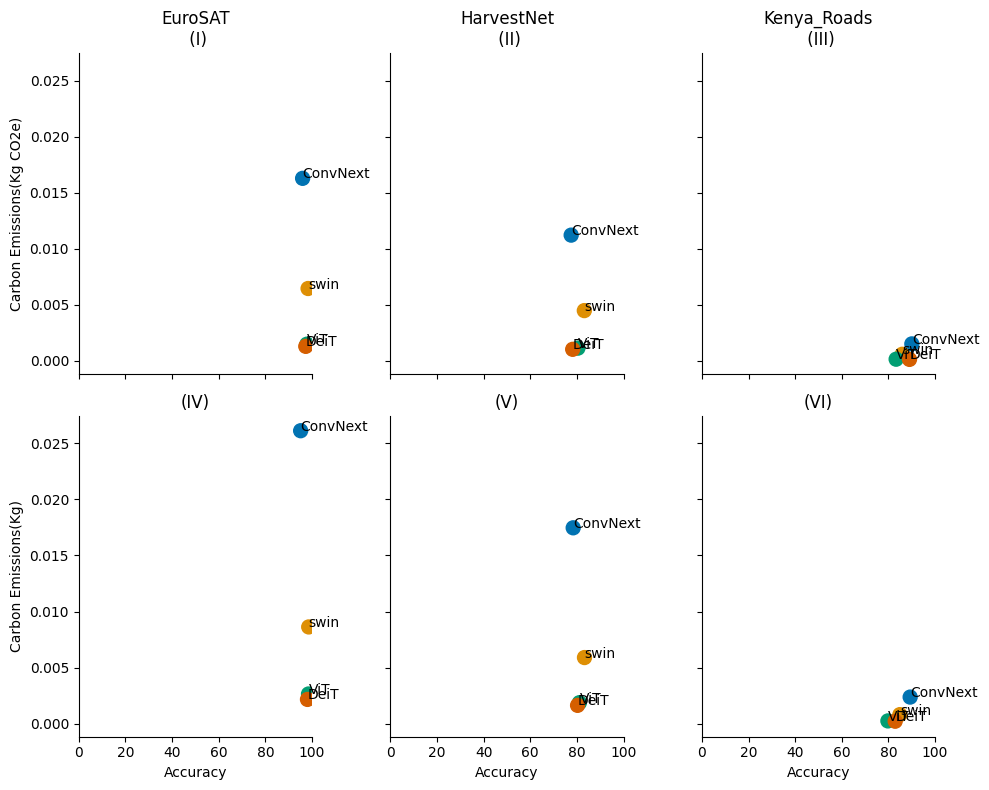

In [15]:
plt.clf()
palette = sns.color_palette("colorblind", 10)
# Set up the figure and axes
fig, axes = plt.subplots(2, 3, figsize=(10, 8), sharey=True, sharex=True)
#fig.suptitle('Accuracy vs. Carbon Emissions for Tiny and Small Models Across Experiments', fontsize=16)

# Plotting accuracy vs carbon emissions for tiny models
label_match = {0:'(I)', 1:'(II)', 2:'(III)' }
for idx, experiment in enumerate(experiments):
    ax = axes[0, idx]
    experiment_data = tiny_models_df[tiny_models_df['experiment_name'] == experiment]
    colors = [palette[i % len(palette)] for i in range(len(experiment_data))]
    ax.scatter(experiment_data['accuracy'], experiment_data['carbon_emissions'], color=colors, label=experiment_data['model_id'], s=100)
    ax.set_title(f"{experiment}\n {label_match.get(idx)}")
    #ax.set_xlabel('Accuracy')
    if idx==0:
        ax.set_ylabel('Carbon Emissions(Kg CO2e)')
    ax.set_xlim(0, 100)
    sns.despine()
    for i, txt in enumerate(experiment_data['model_id']):
        ax.annotate(txt, (experiment_data['accuracy'].iloc[i], experiment_data['carbon_emissions'].iloc[i]), fontsize=10)

# Plotting accuracy vs carbon emissions for small models
label_match = {0:'(IV)', 1:'(V)', 2:'(VI)' }
for idx, experiment in enumerate(experiments):
    ax = axes[1, idx]
    experiment_data = small_models_df[small_models_df['experiment_name'] == experiment]
    colors = [palette[i % len(palette)] for i in range(len(experiment_data))]
    ax.scatter(experiment_data['accuracy'], experiment_data['carbon_emissions'], color=colors, label=experiment_data['model_id'], s=100)
    ax.set_title(f'{label_match.get(idx)}')
    ax.set_xlabel('Accuracy')
    if idx==0:
        ax.set_ylabel('Carbon Emissions(Kg)')
    ax.set_xlim(0, 100)
    sns.despine()
    for i, txt in enumerate(experiment_data['model_id']):
        ax.annotate(txt, (experiment_data['accuracy'].iloc[i], experiment_data['carbon_emissions'].iloc[i]), fontsize=10)

# Adjust layout
plt.tight_layout()


<Figure size 640x480 with 0 Axes>

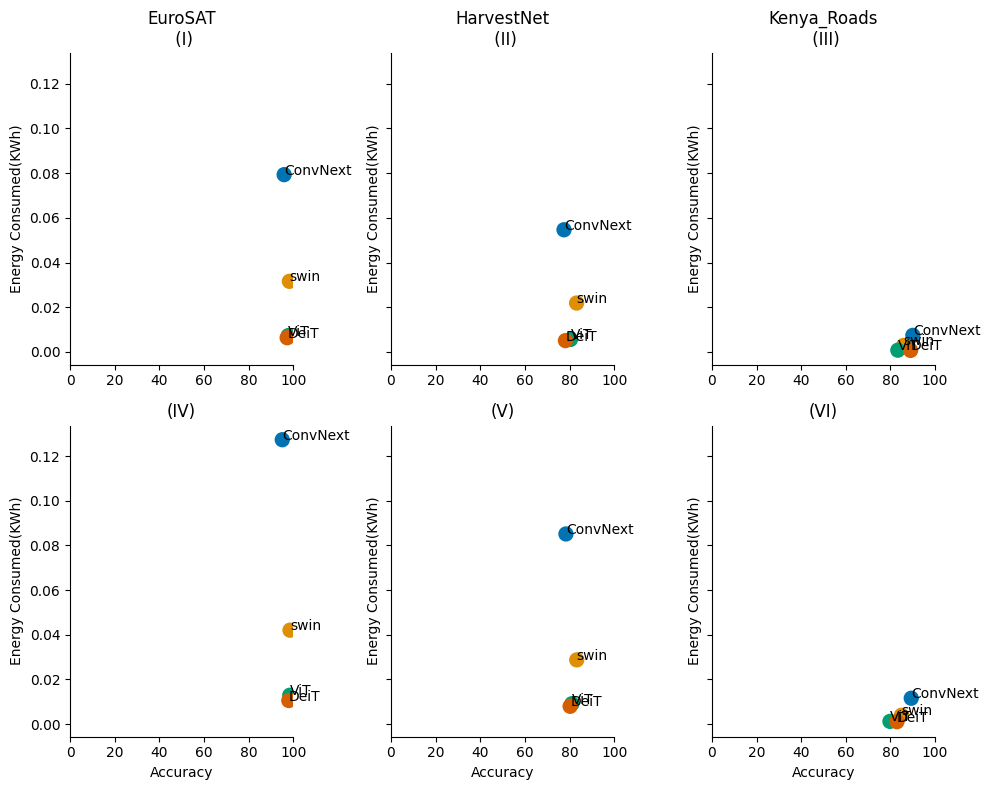

In [16]:
plt.clf()
palette = sns.color_palette("colorblind", 10)
# Set up the figure and axes
fig, axes = plt.subplots(2, 3, figsize=(10, 8), sharey=True)
#fig.suptitle('Accuracy vs. Energy Consumed for Tiny and Small Models Across Experiments', fontsize=16)

# Plotting accuracy vs carbon emissions for tiny models
label_match = {0:'(I)', 1:'(II)', 2:'(III)' }
for idx, experiment in enumerate(experiments):
    ax = axes[0, idx]
    experiment_data = tiny_models_df[tiny_models_df['experiment_name'] == experiment]
    colors = [palette[i % len(palette)] for i in range(len(experiment_data))]
    ax.scatter(experiment_data['accuracy'], experiment_data['energy_consumed'], color=colors, label=experiment_data['model_id'], s=100)
    ax.set_title(f"{experiment}\n {label_match.get(idx)}")
    #ax.set_xlabel('Accuracy')
    ax.set_ylabel('Energy Consumed(KWh)')
    ax.set_xlim(0, 100)
    sns.despine()
    for i, txt in enumerate(experiment_data['model_id']):
        ax.annotate(txt, (experiment_data['accuracy'].iloc[i], experiment_data['energy_consumed'].iloc[i]), fontsize=10)

# Plotting accuracy vs carbon emissions for small models
label_match = {0:'(IV)', 1:'(V)', 2:'(VI)' }
for idx, experiment in enumerate(experiments):
    ax = axes[1, idx]
    experiment_data = small_models_df[small_models_df['experiment_name'] == experiment]
    colors = [palette[i % len(palette)] for i in range(len(experiment_data))]
    ax.scatter(experiment_data['accuracy'], experiment_data['energy_consumed'], color=colors, label=experiment_data['model_id'], s=100)
    ax.set_title(f'{label_match.get(idx)}')
    ax.set_xlabel('Accuracy')
    ax.set_ylabel('Energy Consumed(KWh)')
    ax.set_xlim(0, 100)
    sns.despine()
    for i, txt in enumerate(experiment_data['model_id']):
        ax.annotate(txt, (experiment_data['accuracy'].iloc[i], experiment_data['energy_consumed'].iloc[i]), fontsize=10)

# Adjust layout
plt.tight_layout()


<Figure size 640x480 with 0 Axes>

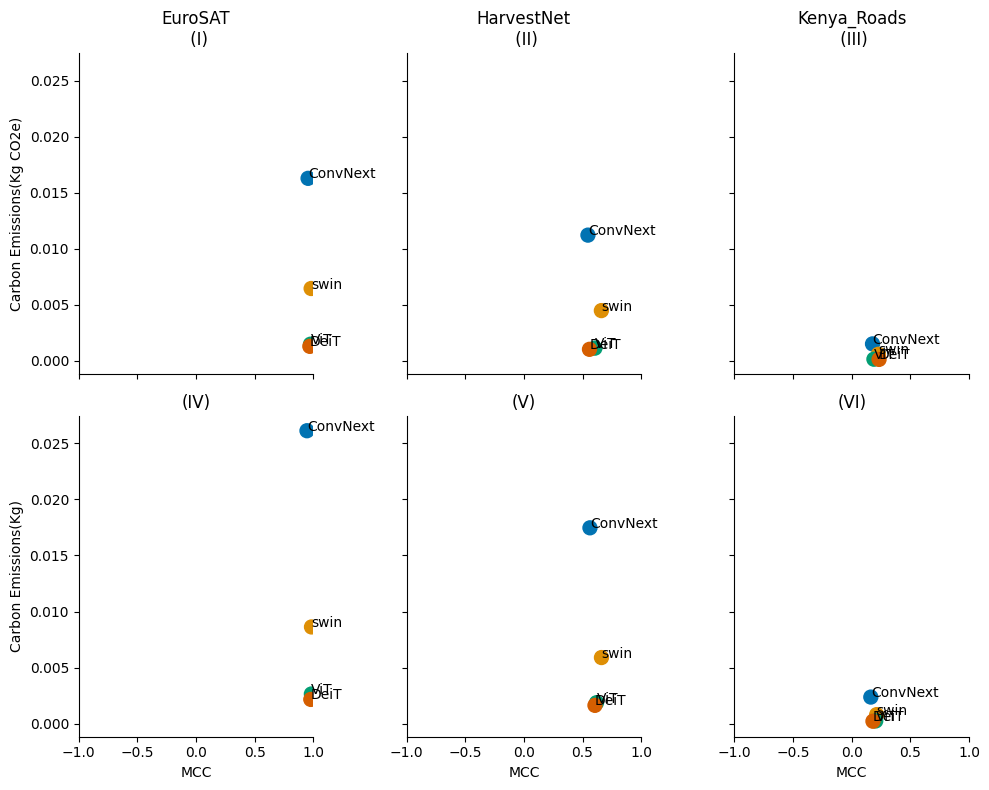

In [17]:
plt.clf()
palette = sns.color_palette("colorblind", 10)
# Set up the figure and axes
fig, axes = plt.subplots(2, 3, figsize=(10, 8), sharey=True, sharex=True)
#fig.suptitle('MCC vs. Carbon Emissions for Tiny and Small Models Across Experiments', fontsize=16)

# Plotting accuracy vs carbon emissions for tiny models
label_match = {0:'(I)', 1:'(II)', 2:'(III)' }
for idx, experiment in enumerate(experiments):
    ax = axes[0, idx]
    experiment_data = tiny_models_df[tiny_models_df['experiment_name'] == experiment]
    colors = [palette[i % len(palette)] for i in range(len(experiment_data))]
    ax.scatter(experiment_data['mcc'], experiment_data['carbon_emissions'], color=colors, label=experiment_data['model_id'], s=100)
    ax.set_title(f"{experiment}\n {label_match.get(idx)}")
    # ax.set_xlabel('MCC')
    if idx==0:
        ax.set_ylabel('Carbon Emissions(Kg CO2e)')
    ax.set_xlim(-1, 1)
    sns.despine()
    for i, txt in enumerate(experiment_data['model_id']):
        ax.annotate(txt, (experiment_data['mcc'].iloc[i], experiment_data['carbon_emissions'].iloc[i]), fontsize=10)

# Plotting accuracy vs carbon emissions for small models
label_match = {0:'(IV)', 1:'(V)', 2:'(VI)' }
for idx, experiment in enumerate(experiments):
    ax = axes[1, idx]
    experiment_data = small_models_df[small_models_df['experiment_name'] == experiment]
    colors = [palette[i % len(palette)] for i in range(len(experiment_data))]
    ax.scatter(experiment_data['mcc'], experiment_data['carbon_emissions'], color=colors, label=experiment_data['model_id'], s=100)
    ax.set_title(f'{label_match.get(idx)}')
    ax.set_xlabel('MCC')
    if idx==0:
        ax.set_ylabel('Carbon Emissions(Kg)')
    ax.set_xlim(-1, 1)
    sns.despine()
    for i, txt in enumerate(experiment_data['model_id']):
        ax.annotate(txt, (experiment_data['mcc'].iloc[i], experiment_data['carbon_emissions'].iloc[i]), fontsize=10)

# Adjust layout
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

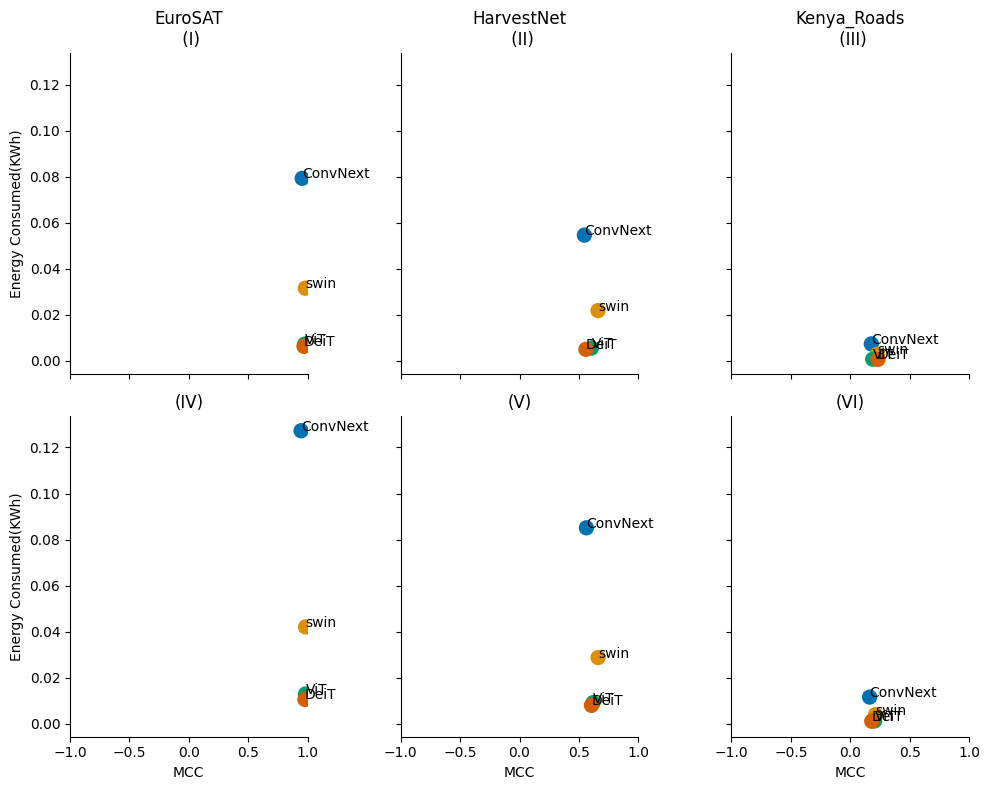

In [18]:
plt.clf()
palette = sns.color_palette("colorblind", 10)
# Set up the figure and axes
fig, axes = plt.subplots(2, 3, figsize=(10, 8), sharey=True, sharex=True)
#fig.suptitle('MCC vs. Energy Consumed for Tiny and Small Models Across Experiments', fontsize=16)

# Plotting accuracy vs carbon emissions for tiny models
label_match = {0:'(I)', 1:'(II)', 2:'(III)' }
for idx, experiment in enumerate(experiments):
    ax = axes[0, idx]
    experiment_data = tiny_models_df[tiny_models_df['experiment_name'] == experiment]
    colors = [palette[i % len(palette)] for i in range(len(experiment_data))]
    ax.scatter(experiment_data['mcc'], experiment_data['energy_consumed'], color=colors, label=experiment_data['model_id'], s=100)
    ax.set_title(f"{experiment}\n {label_match.get(idx)}")
    # ax.set_xlabel('MCC')
    if idx ==0:
        ax.set_ylabel('Energy Consumed(KWh)')
    ax.set_xlim(-1, 1)
    sns.despine()
    for i, txt in enumerate(experiment_data['model_id']):
        # ax.annotate(txt, (experiment_data['mcc'].iloc[i], experiment_data['energy_consumed'].iloc[i]), fontsize=8,bbox=dict(boxstyle="round,pad=0.5", edgecolor="None", facecolor="None"))
        ax.annotate(txt, (experiment_data['mcc'].iloc[i], experiment_data['energy_consumed'].iloc[i]), fontsize=10,)

# Plotting accuracy vs carbon emissions for small models
label_match = {0:'(IV)', 1:'(V)', 2:'(VI)' }
for idx, experiment in enumerate(experiments):
    ax = axes[1, idx]
    experiment_data = small_models_df[small_models_df['experiment_name'] == experiment]
    colors = [palette[i % len(palette)] for i in range(len(experiment_data))]
    ax.scatter(experiment_data['mcc'], experiment_data['energy_consumed'], color=colors, label=experiment_data['model_id'], s=100)
    ax.set_title(f'{label_match.get(idx)}')
    ax.set_xlabel('MCC')
    if idx==0:
        ax.set_ylabel('Energy Consumed(KWh)')
    ax.set_xlim(-1, 1)
    sns.despine()
    for i, txt in enumerate(experiment_data['model_id']):
        #ax.annotate(txt, (experiment_data['mcc'].iloc[i], experiment_data['energy_consumed'].iloc[i]), fontsize=8,bbox=dict(boxstyle="round,pad=0.5", edgecolor="None", facecolor="None"))
        ax.annotate(txt, (experiment_data['mcc'].iloc[i], experiment_data['energy_consumed'].iloc[i]), fontsize=10)

# Adjust layout
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

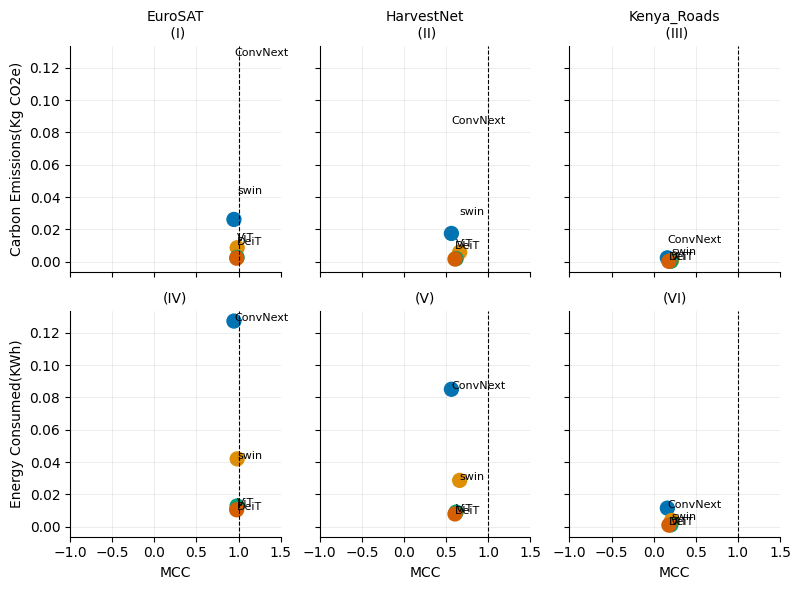

In [19]:
plt.clf()
palette = sns.color_palette("colorblind", 10)
# Set up the figure and axes
fig, axes = plt.subplots(2, 3, figsize=(8, 6), sharey=True, sharex=True)
label_match = {0:'(I)', 1:'(II)', 2:'(III)' }
for idx, experiment in enumerate(experiments):
    ax = axes[0, idx]
    experiment_data = small_models_df[small_models_df['experiment_name'] == experiment]
    colors = [palette[i % len(palette)] for i in range(len(experiment_data))]
    ax.scatter(experiment_data['mcc'], experiment_data['carbon_emissions'], color=colors, label=experiment_data['model_id'], s=100)
    ax.set_title(f"{experiment}\n {label_match.get(idx)}", fontsize=10)
    # ax.set_xlabel('MCC')
    if idx ==0:
        ax.set_ylabel('Carbon Emissions(Kg CO2e)')
    ax.set_xlim(-1, 1.5)
    ax.axvline(x=1, color='k', linestyle='--', linewidth=0.8)
    ax.grid(True, color='gray', linewidth=0.5, alpha=0.2)
    sns.despine()
    for i, txt in enumerate(experiment_data['model_id']):
        ax.annotate(txt, (experiment_data['mcc'].iloc[i], experiment_data['energy_consumed'].iloc[i]), fontsize=8,bbox=dict(boxstyle="round,pad=0.5", edgecolor="None", facecolor="None"))
        #ax.annotate(txt, (experiment_data['mcc'].iloc[i], experiment_data['carbon_emissions'].iloc[i]), fontsize=8,)

# Plotting accuracy vs carbon emissions for small models
label_match = {0:'(IV)', 1:'(V)', 2:'(VI)' }
for idx, experiment in enumerate(experiments):
    ax = axes[1, idx]
    experiment_data = small_models_df[small_models_df['experiment_name'] == experiment]
    colors = [palette[i % len(palette)] for i in range(len(experiment_data))]
    ax.scatter(experiment_data['mcc'], experiment_data['energy_consumed'], color=colors, label=experiment_data['model_id'], s=100)
    ax.set_title(f'{label_match.get(idx)}', fontsize=10)
    ax.set_xlabel('MCC')
    if idx==0:
        ax.set_ylabel('Energy Consumed(KWh)')
    ax.set_xlim(-1, 1.5)
    ax.axvline(x=1, color='k', linestyle='--', linewidth=0.8)
    ax.grid(True, color='gray', linewidth=0.5, alpha=0.2)
    sns.despine()
    for i, txt in enumerate(experiment_data['model_id']):
        ax.annotate(txt, (experiment_data['mcc'].iloc[i], experiment_data['energy_consumed'].iloc[i]), fontsize=8,bbox=dict(boxstyle="round,pad=0.5", edgecolor="None", facecolor="None"))
        #ax.annotate(txt, (experiment_data['mcc'].iloc[i], experiment_data['energy_consumed'].iloc[i]), fontsize=8)

# Adjust layout
plt.tight_layout()